# Packers Games vs. Toyota Stock Analysis
## By Max Yefimov

Everybody in Wisconsin that follows the Packers has heard of the Jordan Love - Toyotathon effect where his gameplay improves drastically during the period. I set out to see if there was any relation between when Packers play and whether or not there is an improvement in Toyota performance immediately after. Although I didn't find any visible evidence of a direct correlation, I did find an interesting single event relating to a Packer event and the Toyota stock price.

## Step 0: Import Statements and CSV Reading

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

df = pd.read_csv("Toyota_Data.csv", parse_dates=["Date"])

## Step 1: Converting All Columns to Their Proper Types + Adding Date Columns

In [339]:
cols_to_convert = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

These columns were specified to be the specific types necessary in order to perform calculations later on.

In [342]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day Of Week"] = df["Date"].dt.day_name()
df

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,Day Of Week
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,1980,3,17,Monday
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,1980,3,18,Tuesday
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,1980,3,19,Wednesday
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,1980,3,20,Thursday
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,1980,3,21,Friday
...,...,...,...,...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700,2024,12,20,Friday
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700,2024,12,23,Monday
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600,2024,12,24,Tuesday
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200,2024,12,26,Thursday


Extra columns added to make it easier to filter by specific date elements.

## Step 2: Cleanup

The year that I was specifically interested in was 2024 simply due to that carrying the Toyotathon narrative most prominently appeared in football discussion, mainly as a joke but with some statistical evidence behind it. Therefore, I trimmed down the dataframe to only include dates in the 2024 year to see the overall trend of the year.

In [346]:
df = df[df['Year'] == 2024]
df

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,Day Of Week
11041,2024-01-02,181.369995,181.369995,182.899994,181.160004,182.149994,243700,2024,1,2,Tuesday
11042,2024-01-03,181.550003,181.550003,182.470001,180.070007,180.839996,273500,2024,1,3,Wednesday
11043,2024-01-04,182.970001,182.970001,184.199997,182.729996,183.089996,273100,2024,1,4,Thursday
11044,2024-01-05,187.070007,187.070007,188.710007,185.639999,186.000000,336100,2024,1,5,Friday
11045,2024-01-08,187.889999,187.889999,188.160004,186.429993,187.500000,359400,2024,1,8,Monday
...,...,...,...,...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700,2024,12,20,Friday
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700,2024,12,23,Monday
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600,2024,12,24,Tuesday
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200,2024,12,26,Thursday


## Step 3: Yearly Trend

This step highlighted that the difference between the earlier portions of the year and the football season are very drastic, and therefore including the year overall would most likely limit the visual impact of Packer games on stock as it would just be too hard to tell. Therefore the range of the dataset was further reduced to only the start of September until the end of December as the dataframe did not include any 2025 content.

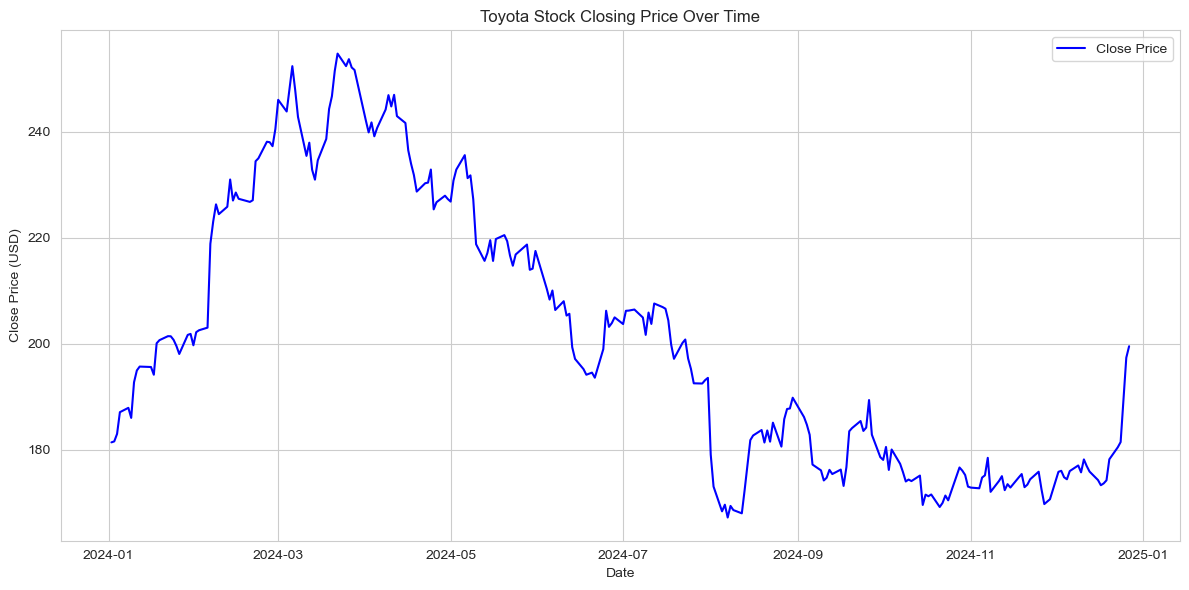

In [349]:
plt.figure(figsize = (12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", color = "blue")
plt.title("Toyota Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [350]:
df = df[~df['Month'].isin([1, 2, 3, 4, 5, 6, 7, 8])]
df

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,Day Of Week
11209,2024-09-03,186.149994,186.149994,189.699997,185.600006,187.800003,329700,2024,9,3,Tuesday
11210,2024-09-04,184.710007,184.710007,185.940002,183.619995,183.919998,218100,2024,9,4,Wednesday
11211,2024-09-05,182.800003,182.800003,183.410004,181.770004,182.789993,224600,2024,9,5,Thursday
11212,2024-09-06,177.179993,177.179993,181.550003,176.889999,181.190002,288600,2024,9,6,Friday
11213,2024-09-09,176.080002,176.080002,177.089996,174.580002,175.600006,408300,2024,9,9,Monday
...,...,...,...,...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700,2024,12,20,Friday
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700,2024,12,23,Monday
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600,2024,12,24,Tuesday
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200,2024,12,26,Thursday


## Step 4: Football Season Stock Trends

This step was a massive improvement on the previous graph, where now the trends are much more readily visible between the weeks and days. This shows some potential areas where Packer games could have influenced stock prices but without plotting the actual dates this isn't visible yet. Included is a red line that was developed from a further graph that will be explained a little further in the project.

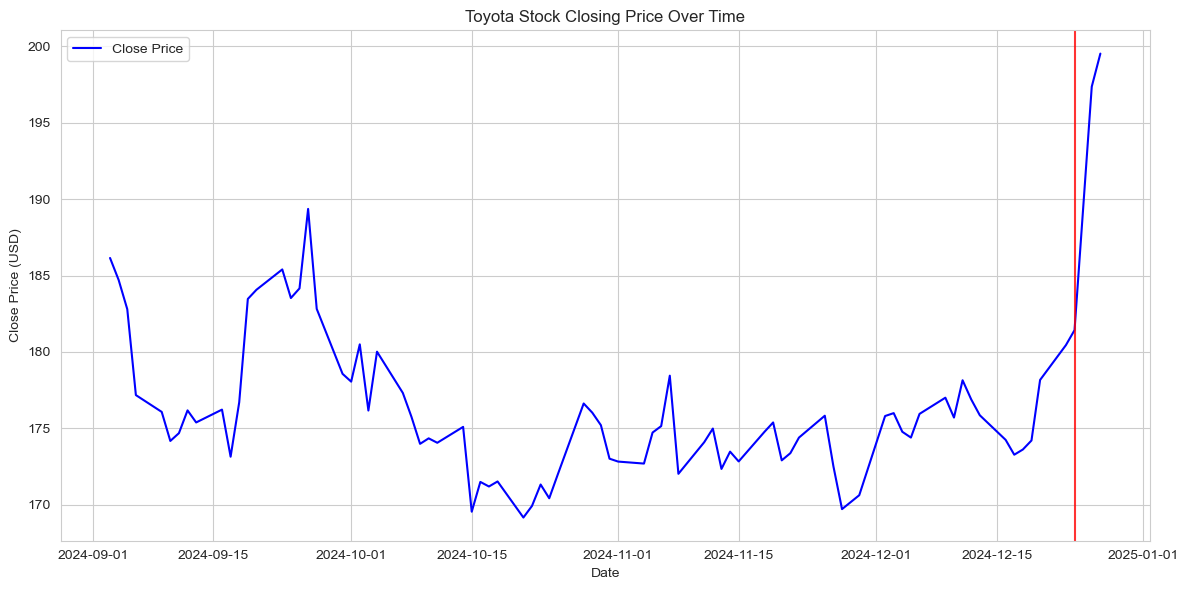

In [354]:
plt.figure(figsize = (12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", color = "blue")
plt.axvline(x=pd.to_datetime("2024-12-24"), color='red', linestyle='-', alpha = 0.8)
plt.title("Toyota Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

## Step 5: Daily Return

This step was done to get to Daily Return, which is the baseline metric for comparing day-to-day stock trends. It's a standard way to express how much a stock has gained or lost in percentage terms from one trading day to the next. Therefore, I created a graph of the Daily Return of the days within our range where we can start to see at what point the stock had some of the biggest changes.

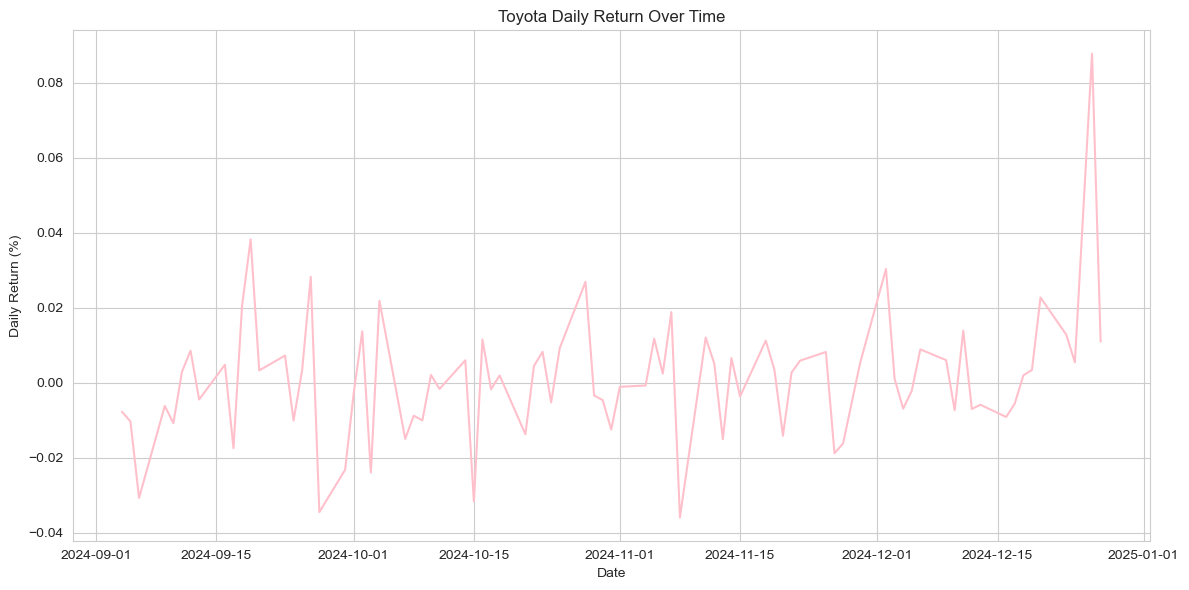

In [357]:
#Daily percent change to measure day-to-day stock performance
df = df.copy()
df["Daily Return"] = df["Close"].pct_change()

#Plotting Daily Return Over Time
plt.figure(figsize = (12, 6))
plt.plot(df["Date"], df["Daily Return"], color = "pink")
plt.title("Toyota Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.tight_layout()
plt.show()

## Step 6: Ten Best Days

This step was important because I believed the easiest way to identify whether or not Packers games positively influenced the Toyota stock. To accomplish this I picked out the 10 best days by Daily Return, the most positive ones. Then, I graphed it in order to visualize. The graph is the same as the Daily Return, however it now marks the specific points that represent the 10 highest days for easier visualization, along with placing vertical lines at the specific dates that Packers games were played.

In [360]:
best_10_days = df.nlargest(10, "Daily Return")[["Date", "Daily Return"]]
print("Top 10 Best Days:")
print(best_10_days)

Top 10 Best Days:
            Date  Daily Return
11289 2024-12-26      0.087803
11221 2024-09-19      0.038255
11272 2024-12-02      0.030358
11226 2024-09-26      0.028236
11248 2024-10-28      0.026919
11286 2024-12-20      0.022731
11232 2024-10-04      0.021854
11220 2024-09-18      0.020560
11256 2024-11-07      0.018841
11279 2024-12-11      0.013886


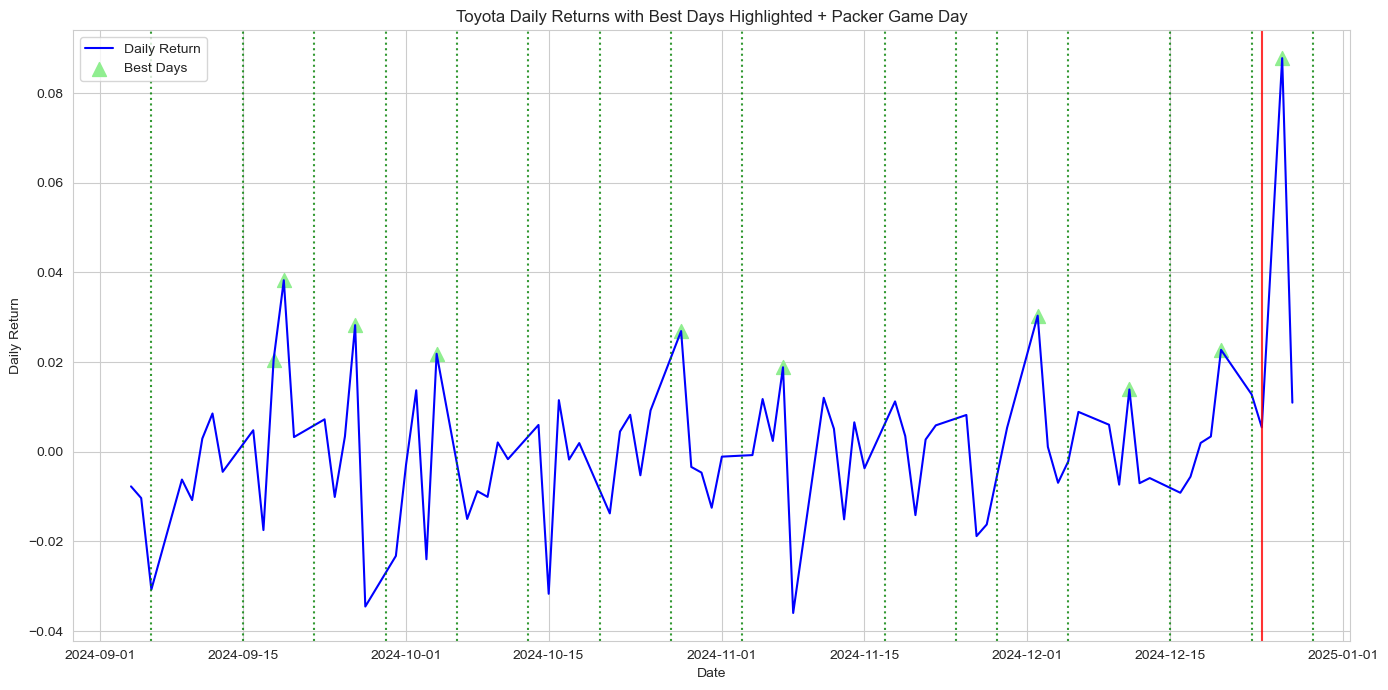

In [362]:
plt.figure(figsize = (14,7))
plt.plot(df["Date"], df["Daily Return"], label = "Daily Return", color = "blue")

#Scatter plots
plt.scatter(best_10_days["Date"], best_10_days["Daily Return"], color = "lightgreen", label = "Best Days", marker = "^", s = 100)

packers_game_dates = [
    pd.Timestamp('2024-09-06'),
    pd.Timestamp('2024-09-15'),
    pd.Timestamp('2024-09-22'),
    pd.Timestamp('2024-09-29'),
    pd.Timestamp('2024-10-06'),
    pd.Timestamp('2024-10-13'),
    pd.Timestamp('2024-10-20'),
    pd.Timestamp('2024-10-27'),
    pd.Timestamp('2024-11-03'),
    pd.Timestamp('2024-11-17'),
    pd.Timestamp('2024-11-24'),
    pd.Timestamp('2024-11-28'),
    pd.Timestamp('2024-12-05'),
    pd.Timestamp('2024-12-15'),
    pd.Timestamp('2024-12-23'),
    pd.Timestamp('2024-12-29')
]

for gdate in packers_game_dates:
    plt.axvline(x=gdate, color='green', linestyle=':', alpha=0.8)

plt.axvline(x=pd.to_datetime("2024-12-24"), color='red', linestyle='-', alpha = 0.8)

#Labeling the graph
plt.title("Toyota Daily Returns with Best Days Highlighted + Packer Game Day")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.tight_layout()
plt.show()

## Step 7: Rejection of Hypothesis

Looking at the graph, it is incredibly evident that there does not appear to be any kind of correlation between when Packers games were played. Out of the 16 visible games, 10 or so have a visible increase in the Daily Return in the day after, with several having pitfalls immediately after. There are also games that straight up fall into a dip in the graph. Looking at this, the narrative that I wanted to see in the data clearly falls apart and led me to consider other avenues.

### The Red Line

The red line marks the exact date that the Packers officially clinched the playoffs for the 2024-25 season. December 24th, 2024. What follows is the highest peak during this portion of the football season for the Daily Return, which occurred two days after on December 26th, 2024. Plotting the red line allows us to see that graphically it appears that the Packers clinching the playoffs had a direct and drastic impact on the Toyota stock.

Now to acknowledge the obvious, this is due to Christmas most likely. The Packers clinching the playoffs likely had minimal effect, bar a promotion from Toyota for their representative in Jordan Love.

However, this project is intended to show a use for data to create entertaining social media posts for the Lambeau Leapers, and this kind of tongue-and-cheek humor is perfect for insinuating a correlation that is clearly false as soon as someone thinks about it for more than 5 seconds, but perfectly entertaining enough for a brief one off post.

Therefore, this is a great find within the data even if the original narrative did not pan out for the post idea I had intended.

## Step 8: Putting a Number to the Event

Social media posts often require some "impressive" numbers alongside visuals in order to capture attention, and therefore I wanted to incorporate a number alongside what I had shown graphically. The best way to do this was to simply find the cumulative return between December 24th and December 26th in order to show the stock % change.  

This differs from just adding up the daily percentage changes. Cumulative return accounts for compounding, meaning each day’s return builds on the previous day’s total rather than treating them as separate, flat additions. Mathematically, it’s calculated by multiplying the individual daily return factors (1 + return) together, then subtracting 1 at the end to convert back into a percent. This gives a more accurate representation of the true total change in stock value over that time frame, and is often larger than what simple addition would be.

In [365]:
# Get just the two days that exist
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
two_day_period = df.loc[['2024-12-24', '2024-12-26']]

# Calculate cumulative return over those 2 days
cumulative_return = (1 + two_day_period['Daily Return']).prod() - 1

print(f"2-day cumulative return: {cumulative_return:.1%}")
print("Individual days:")
print(two_day_period['Daily Return'])

2-day cumulative return: 9.4%
Individual days:
Date
2024-12-24    0.005431
2024-12-26    0.087803
Name: Daily Return, dtype: float64


# Summary

The final number that I got through calculations was 9.4% which to anyone familiar with stocks is a massive jump. The stock market is closed on Christmas, therefore the usage of two dates with one between them missing doesn't affect anything.

Although I set out to find a certain narrative to create a social media post around, I did not find it. What I was able to do is pivot and use some creativity to find another statistic that actually fulfilled the original goal I was aiming for, which was creating data based content for a funny post.

## Further Development

If I had to redo this project I believe I would incorporate more advanced statistics. The marker of Packer game days is certainly important, but separating them based on W/L could have shown a relationships specifically between Packer performance and Toyota performance. Another angle would be comparing Jordan Love games and his QB rating or other statistics to determine if there is a relationship between his individual performance and the performance of Toyota.